# You Already Know About Supervised Learning
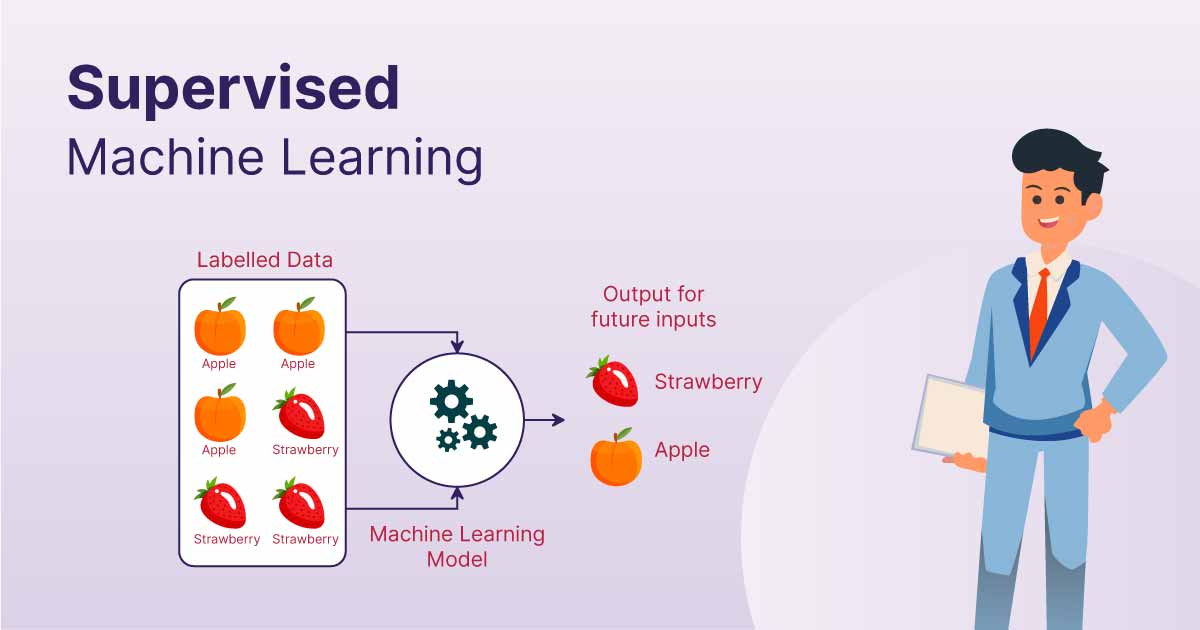

# What Is Unsupervised Learning
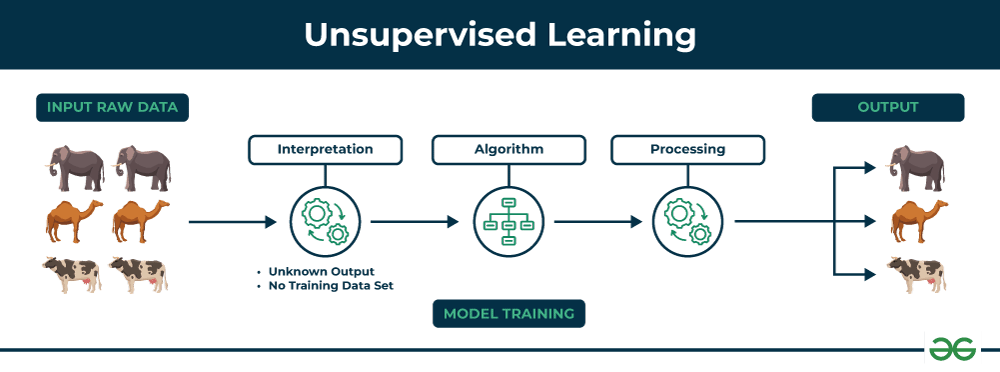

# USE CASES OF UNSUPERVISED LEARNING

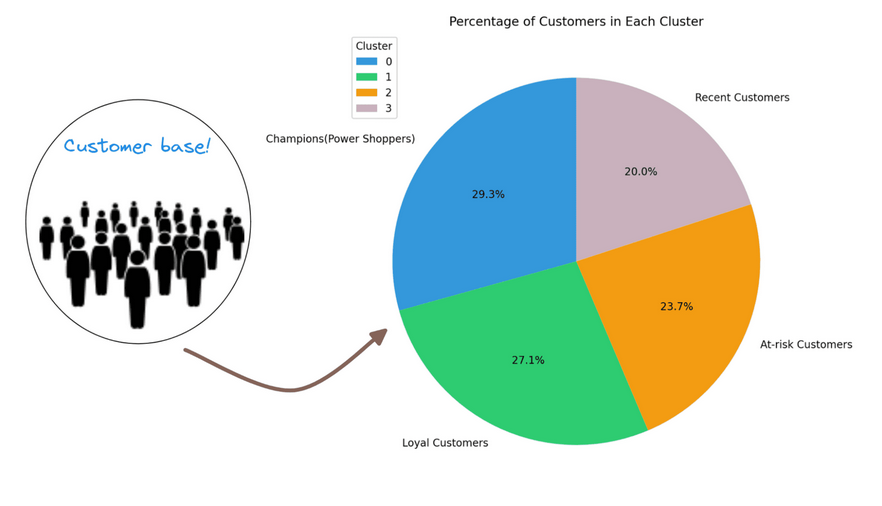



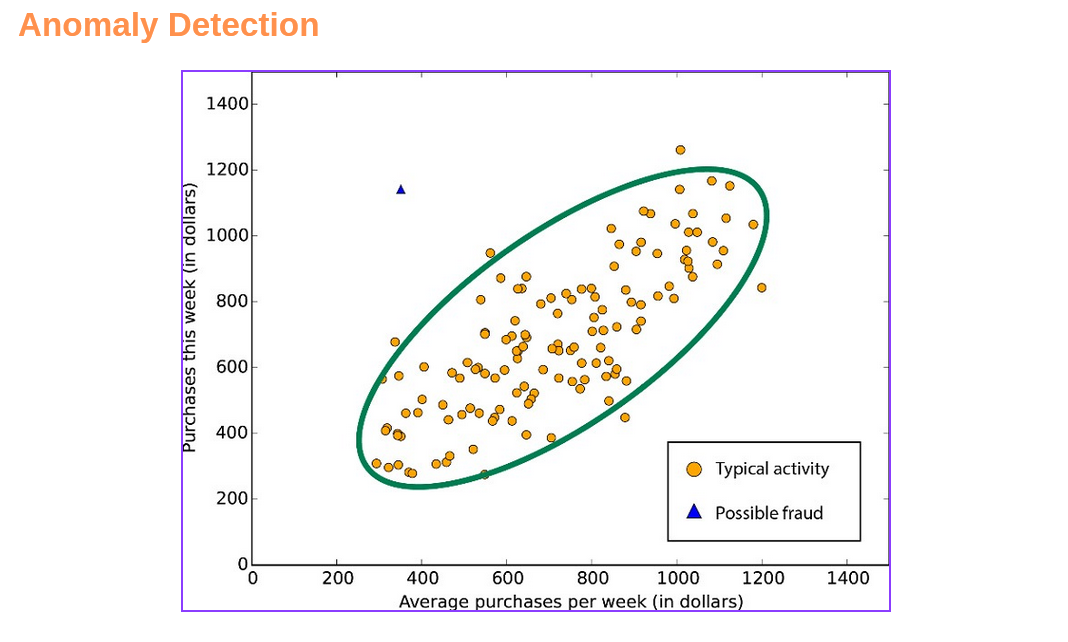


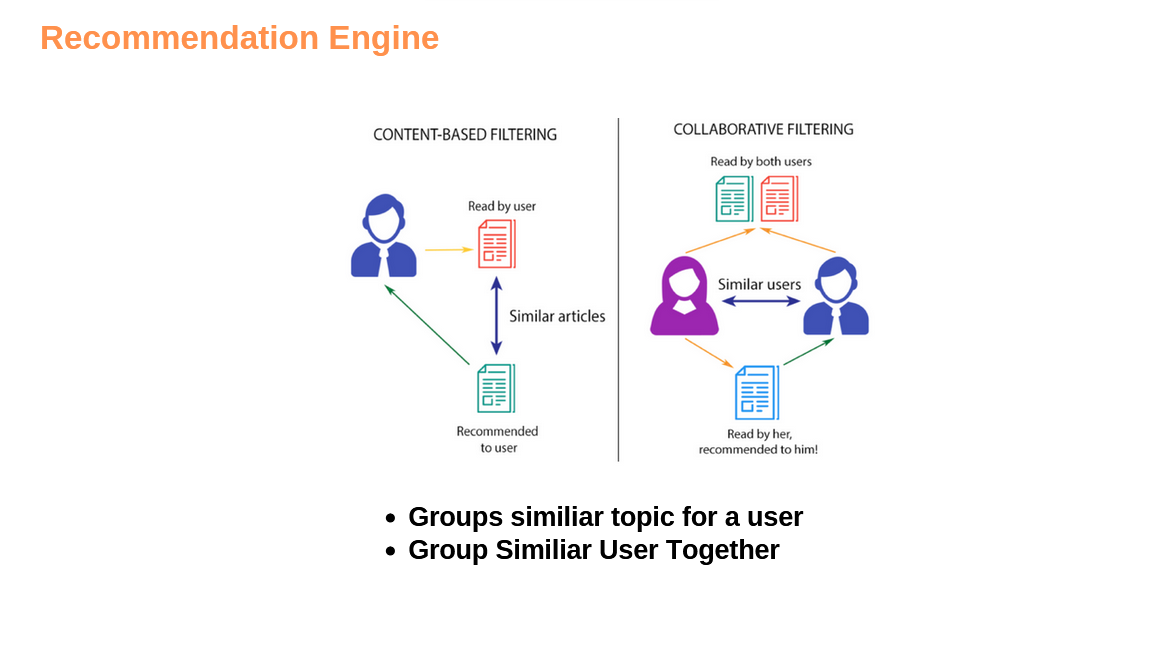

# üìä Introduction to K‚ÄëMeans Clustering & PCA

### üìö Theory: What is K-Means Clustering?

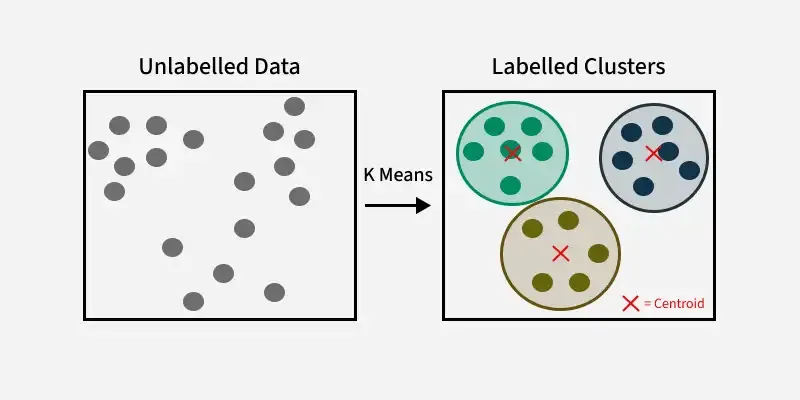



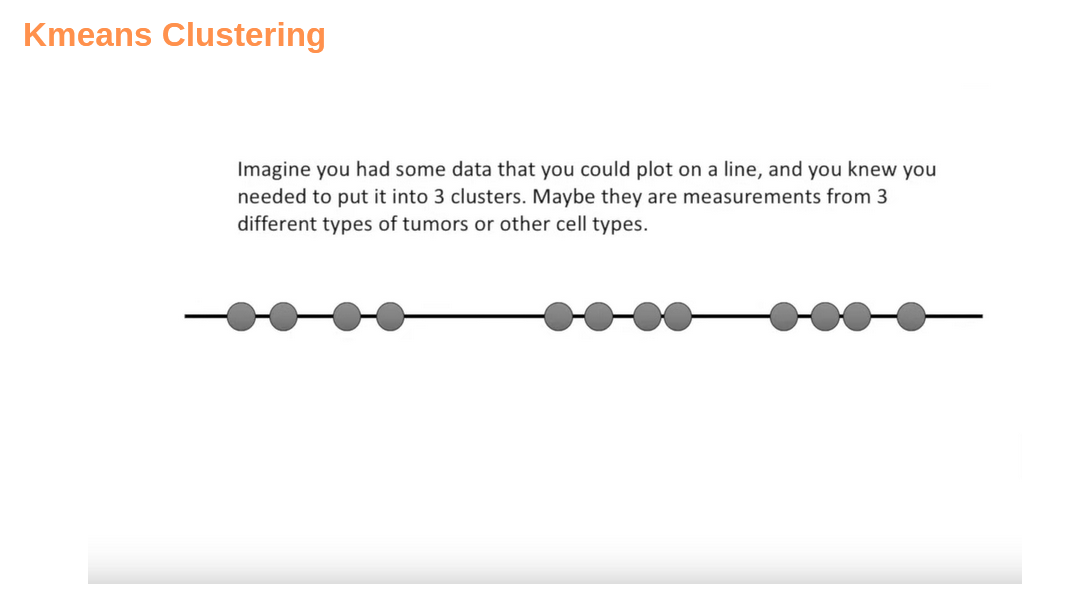


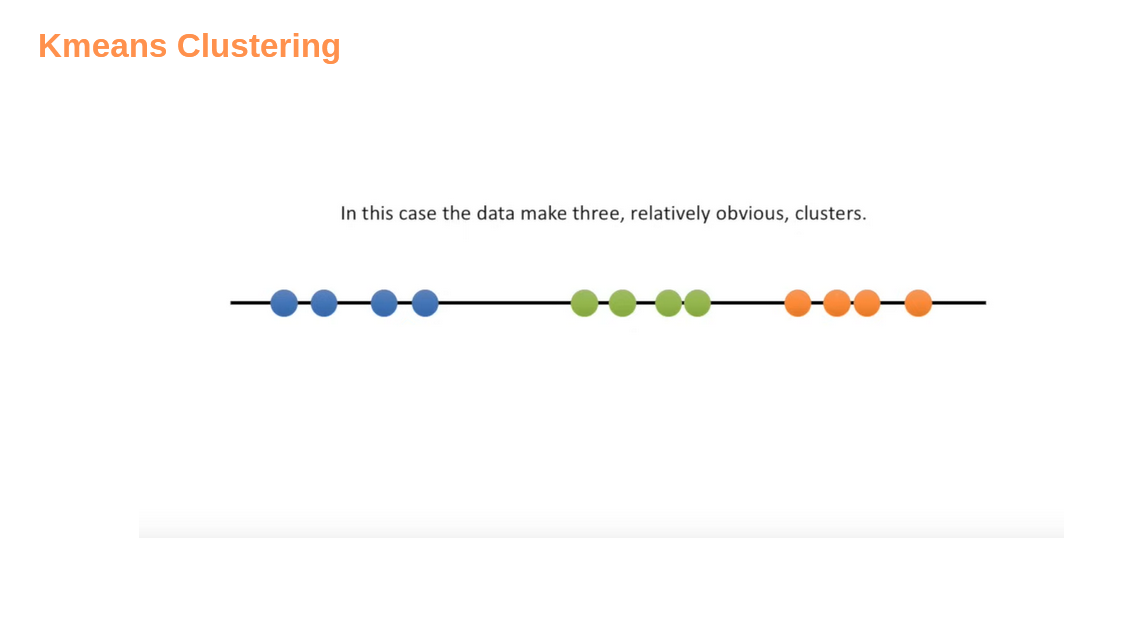


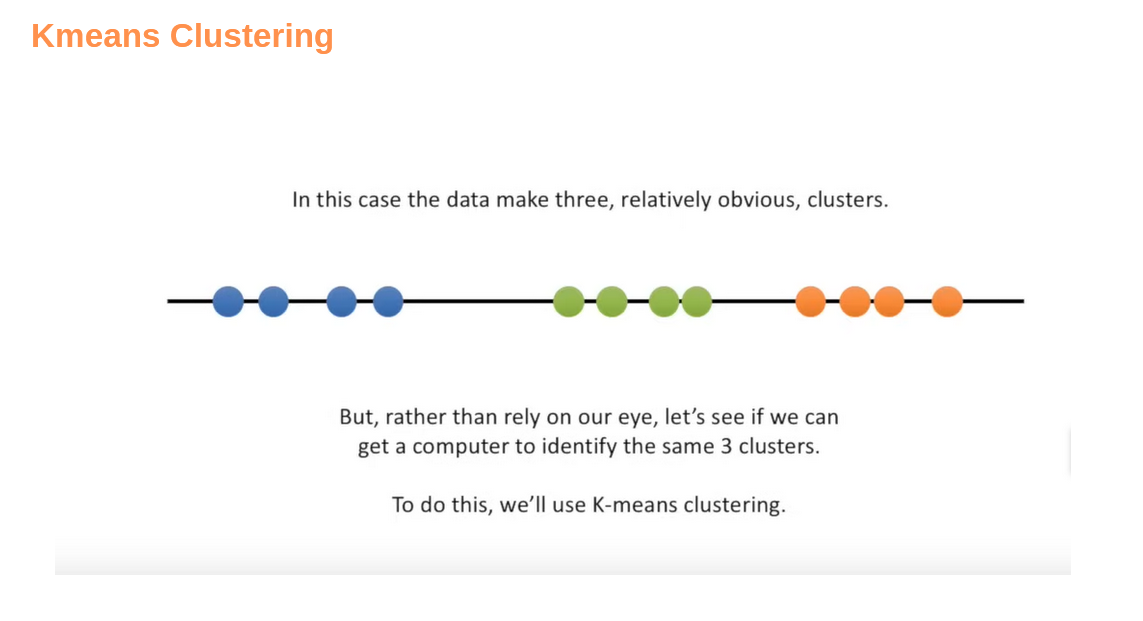


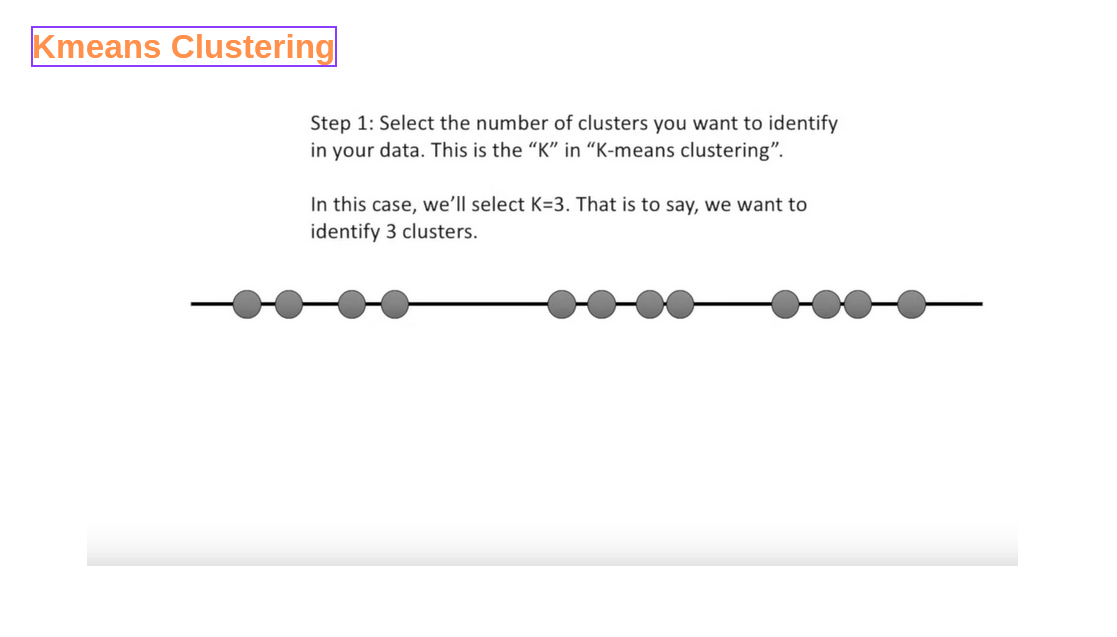

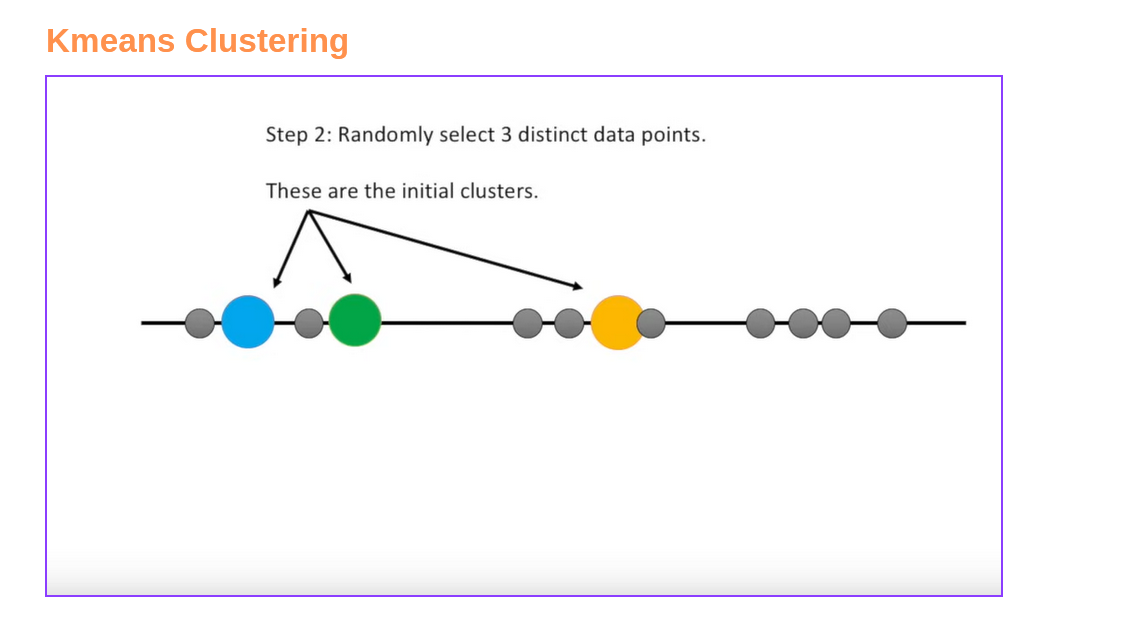

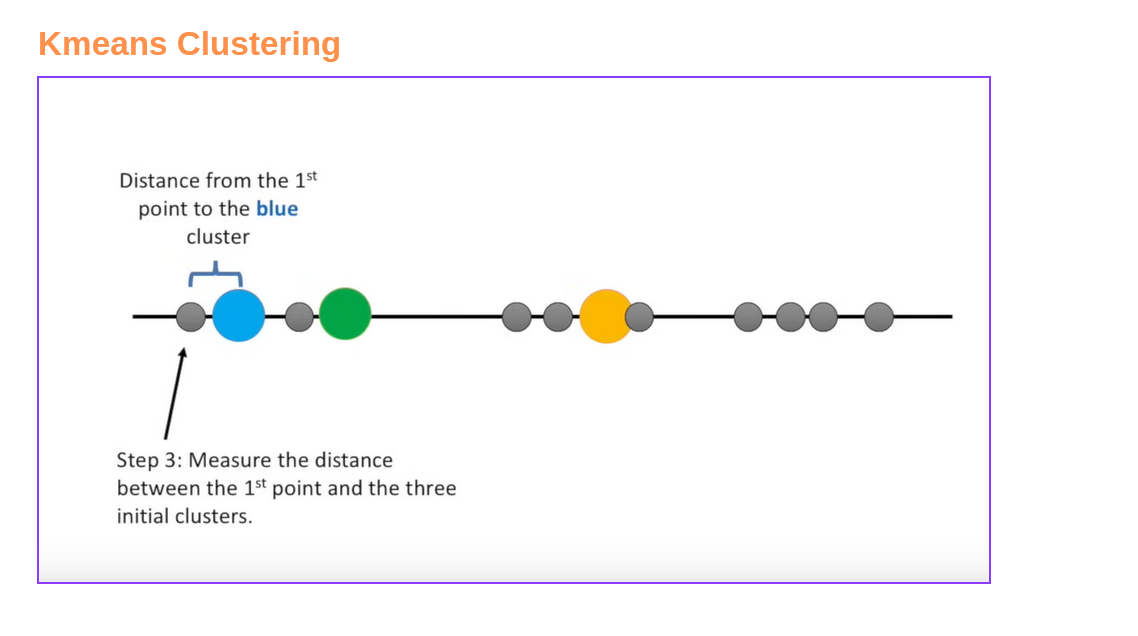

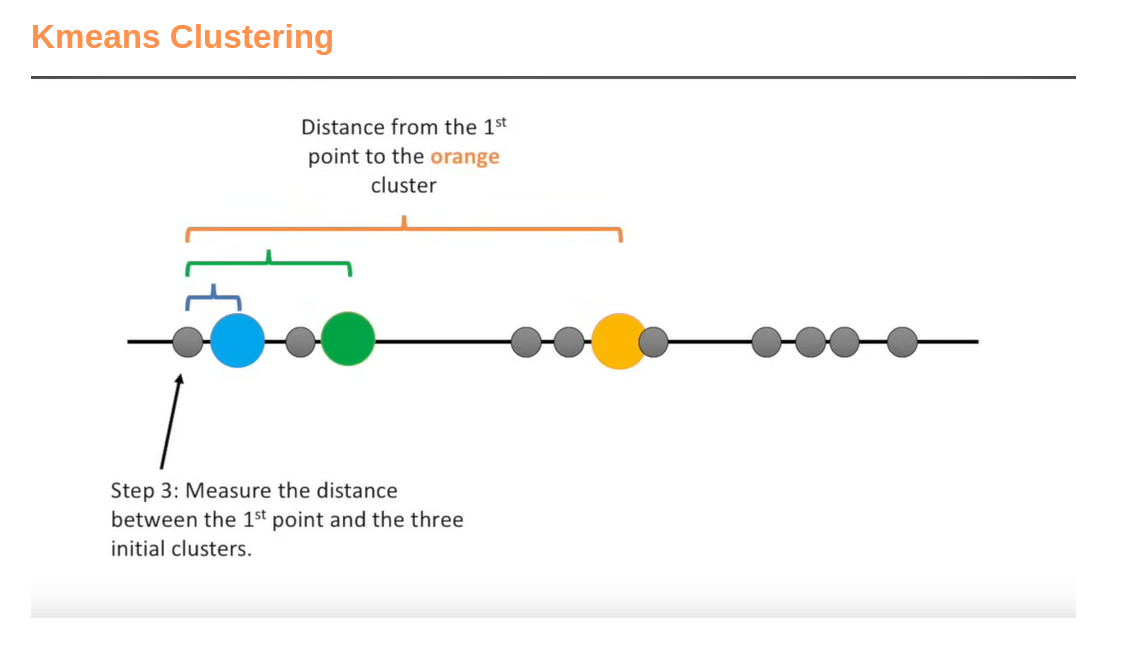

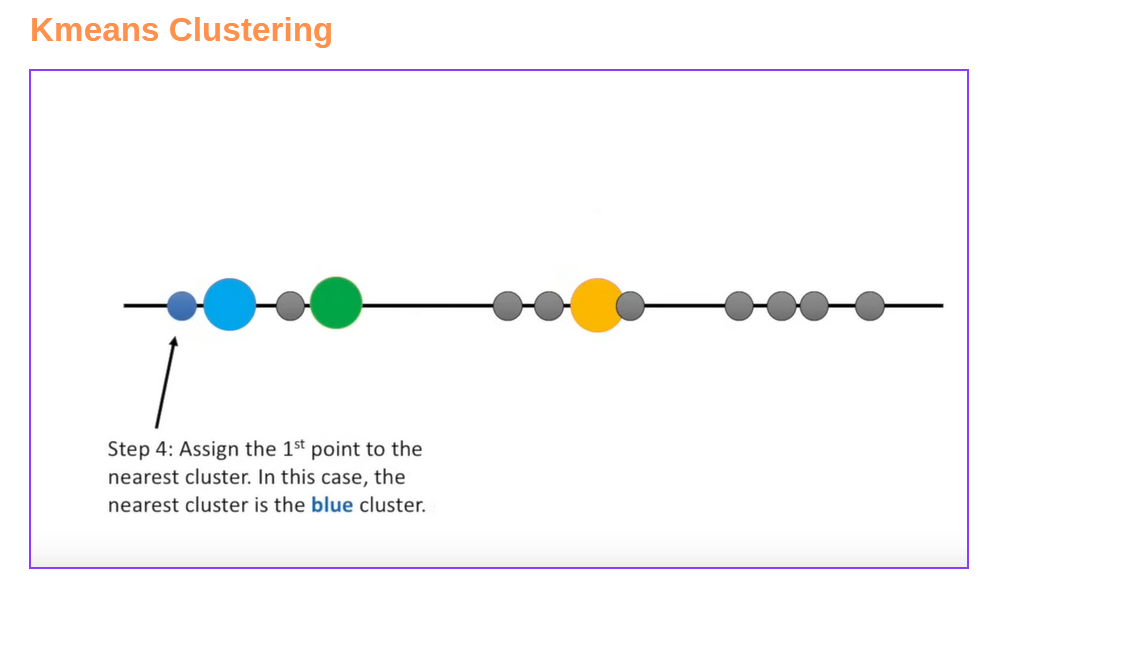

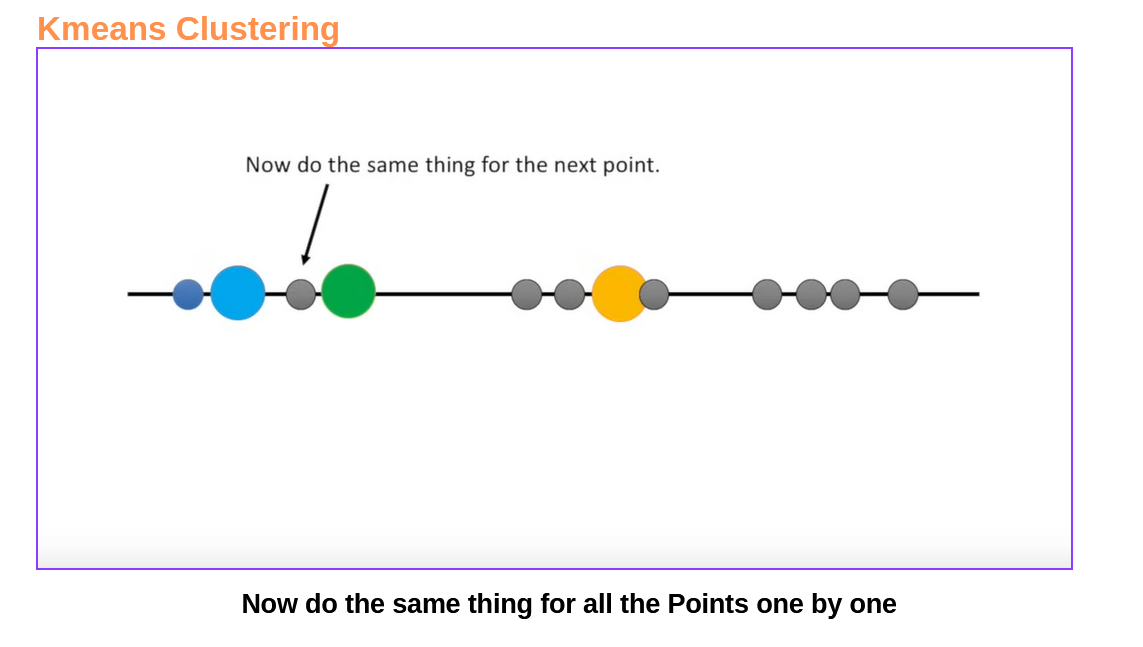


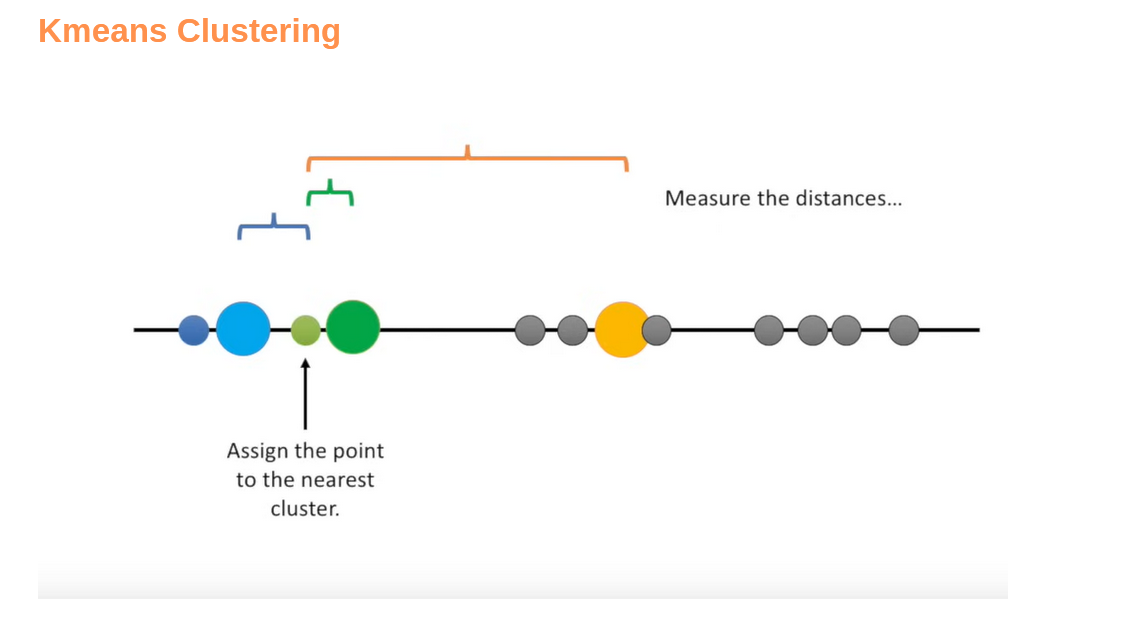


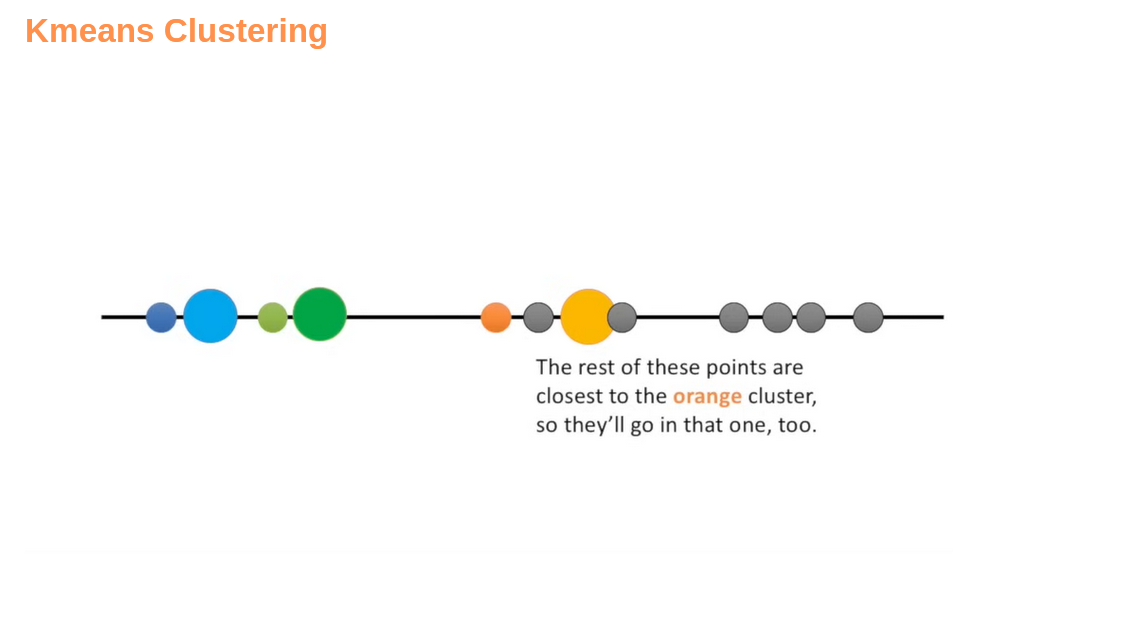

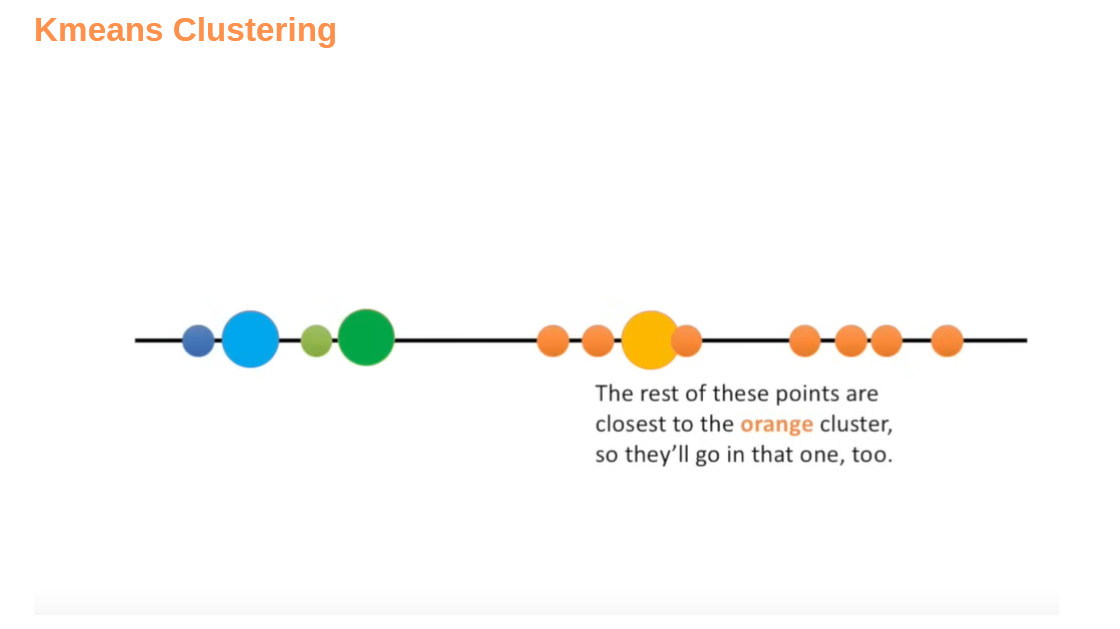

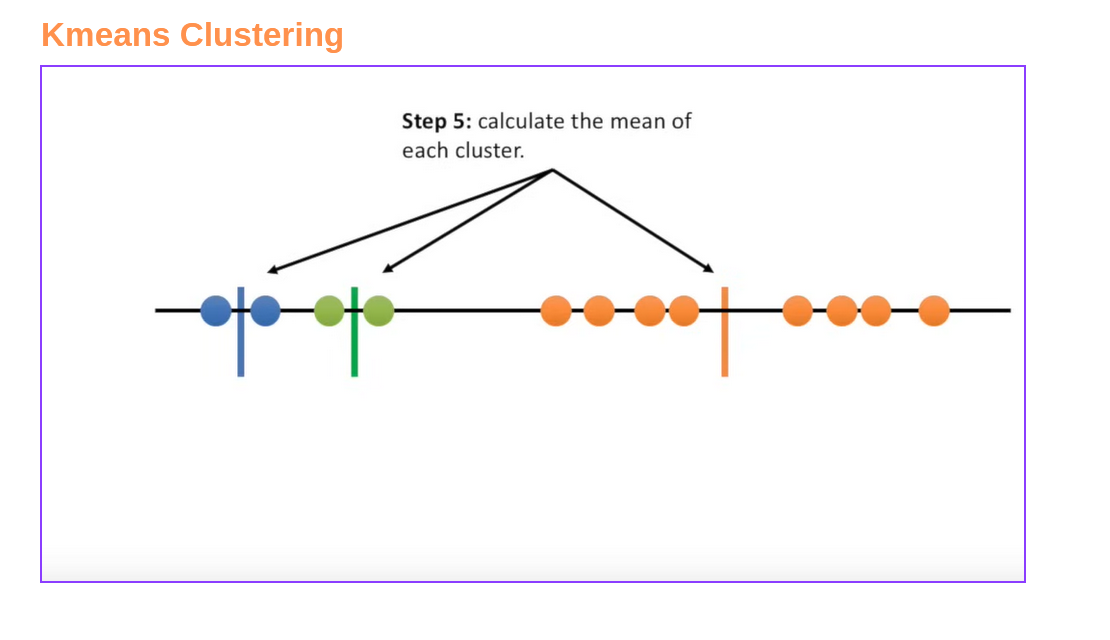

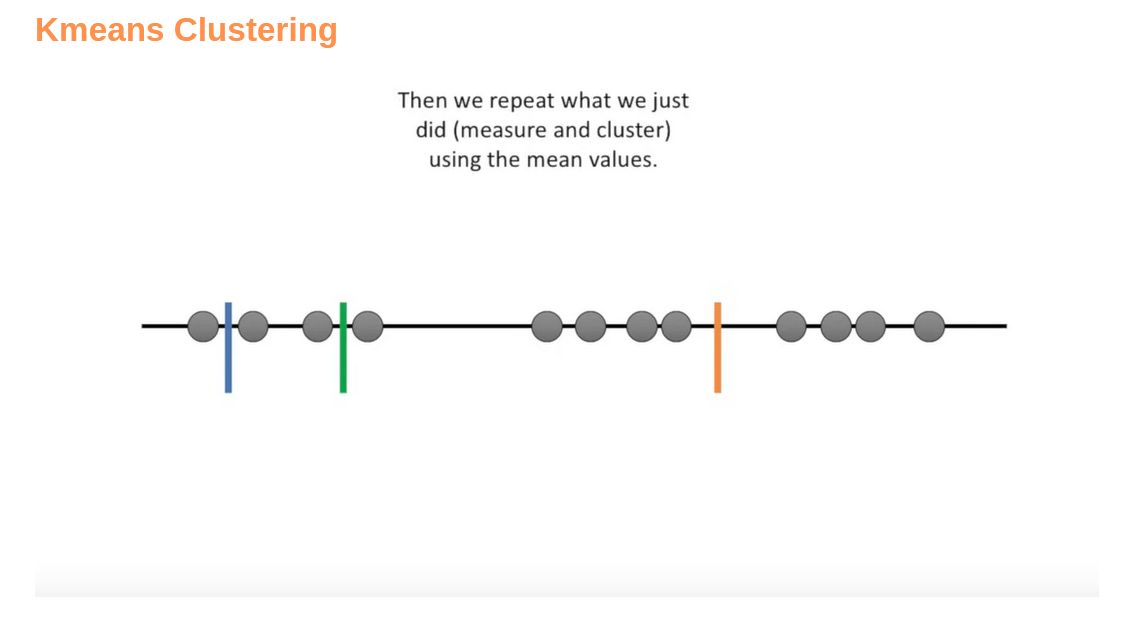


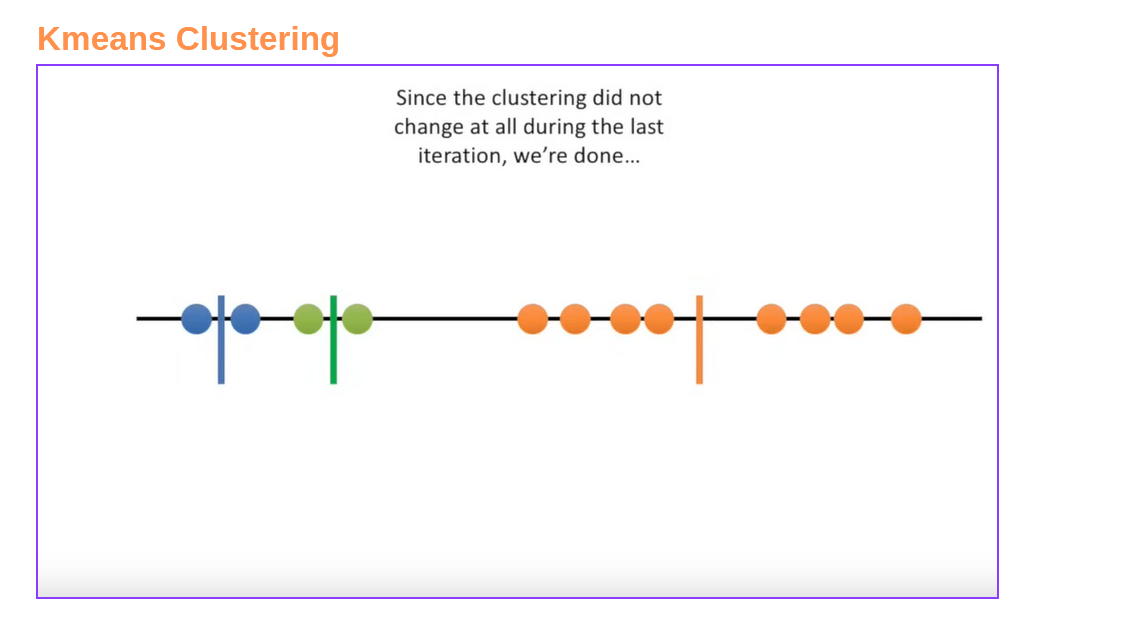
## K-Means is an **unsupervised learning** algorithm used to group similar data points into **K clusters**.
## It works by:
## 1. Choosing K random points as initial cluster centroids.
##  2. Assigning each point to the nearest centroid.
## 3. Updating centroids based on the mean of points in each cluster.
## 4. Repeating steps 2‚Äì3 until centroids don‚Äôt change much.
## It helps us find structure in unlabeled data.

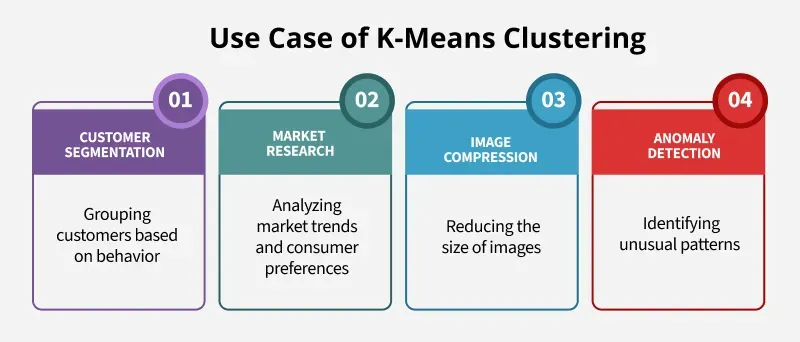


In [ ]:

# 1. Load libraries & data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load dataset

df = pd.read_csv("/content/Mall_Customers(2).xls")
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# 2. Basic EDA (Exploratory Data Analysis)
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%

In [ ]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [ ]:
df['Genre']

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
73    6
46    6
48    5
     ..
68    1
85    1
23    1
8     1
18    1
Name: count, Length: 84, dtype: int64

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# kmeans++


In [ ]:
import plotly.express as px

# Gender distribution
fig = px.bar(df, x='Genre', title='Gender Distribution')
fig.show()

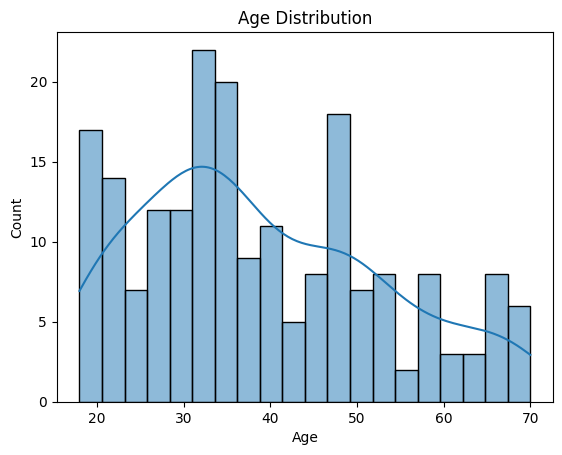

In [ ]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

How this plot helps you:

This histogram helps you understand the age demographics of your mall customers at a glance. You can see:

    The most common age groups (where the bars are highest).
    The range of ages among your customers.
    If the age distribution is spread out or concentrated in certain areas.
    Any potential outliers or unusual patterns in age.


The histogram shows that the majority of the mall customers are between the ages of 20 and 50.The distribution appears somewhat skewed towards younger ages.

In [ ]:
import plotly.express as px

# Income vs Spending
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', title='Income vs Spending Score')
fig.show()

The scatter plot titled "Income vs Spending Score" shows the relationship between a customer's annual income (in thousand dollars) and their spending score. Here's what we can interpret from the plot:
Observations:

    No Clear Linear Relationship:

        There doesn't appear to be a strong linear correlation between income and spending score.

        Customers with similar income levels have widely varying spending scores.

    Clusters of Customers:

        Low Income, High Spending: Some customers with income around $20k‚Äì$40k have very high spending scores.

        Low Income, Low Spending: Others with similar income have very low spending scores.

        Mid Income (~60k): There‚Äôs a dense cluster of customers with a wide range of spending behavior (40‚Äì60 spending score), suggesting average income individuals with moderate spending.

        High Income, Low/High Spending: Customers earning above $100k show a wide variance in spending‚Äîsome spend very little, others a lot.

    Possible Segmentation:

        This plot might be useful for customer segmentation (e.g., via clustering techniques like K-Means).

        It suggests at least 4‚Äì5 customer behavior groups based on income and spending.

Conclusion:

There is no strong correlation between income and spending score. Instead, the data indicates that customers' spending behavior is not solely dependent on their income, hinting that other factors (e.g., lifestyle, age, marketing influence) may also play a significant role.

In [ ]:
# # Fill missing values with the median
# df['Age'].fillna(df['Age'].median(), inplace=True)
# df['Annual_Income_(k$)'].fillna(df['Annual_Income_(k$)'].median(), inplace=True)
# df['Spending_Score'].fillna(df['Spending_Score'].median(), inplace=True)

# # Check for missing values again
# print("\nMissing Values after filling:")
# print(df.isnull().sum())

In [ ]:
# 3. K‚ÄëMeans basics and grouping similar points
X = df[['Annual Income (k$)','Spending Score (1-100)']].values


In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
# from pickle import HIGHEST_PROTOCOL
# # K-means

# 3 cluster  c1 , c2 ,c3

# 1 2 3 4 5 6
# C1 C1 C1 C2 C3 C2

# sse =  (C1_Centroid -P1)^2 + (C1_Centroid-p2)^2 + (C1_Centroid -p3)*2 + (C2_Centroid-p4)**2 +(C2_Centroid-p6)**2 + (C3_Centroid -p5)**2
# sse low , error low

# sse hight ,error HIGh

# k =1 , sse =....



# 1......n

# K=n , sse = 0


# Interpretation: The clusters represent groups of customers with similar spending habits and income levels.

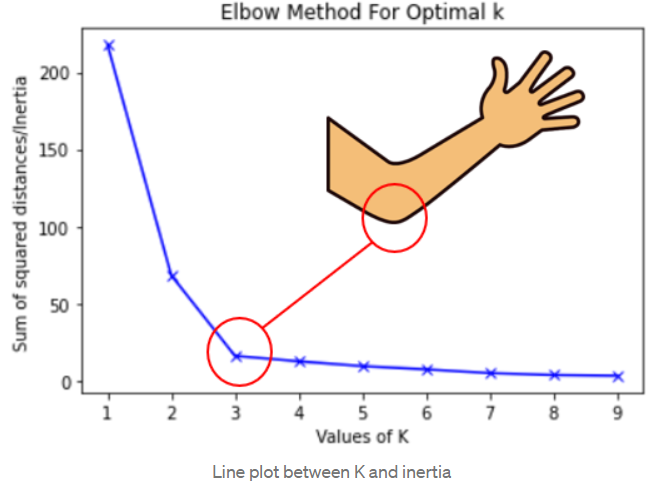

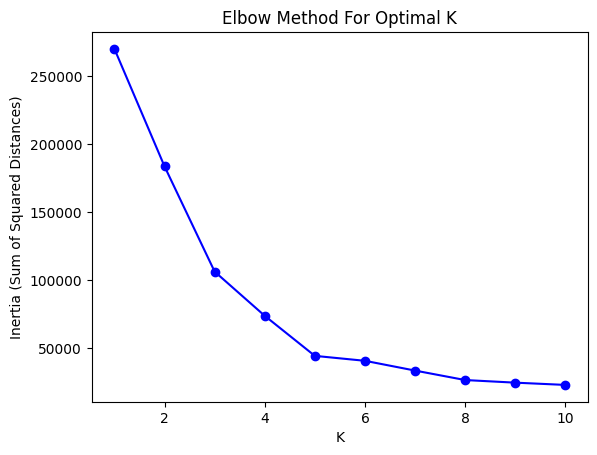

In [ ]:

# 4. Choosing K: The Elbow Method
inertia = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('K')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal K')
plt.show()



Interpretation: The "elbow" point is where adding more clusters doesn't improve the result much.


Here, K=5 is the most Optimal Choice

### üìö Theory: What is PCA (Principal Component Analysis)?
## PCA is a technique for **reducing the number of features** in your data while keeping most of the important patterns.
### It works by:
### 1. Standardizing the data.
### 2. Finding new axes (called principal components) that maximize variance.
### 3. Projecting the data onto these new axes.
### PCA is useful for:
### - Visualizing high-dimensional data.
###- Speeding up models by removing redundant features.

In [ ]:
# # 100 feature High Dimensinal -> 2D/3D (Visualization)

# # Dataset (Height ,Weight) ->

# # X height , Y weight   -> Diagonal Axis (Prinicipal)

# 2D scaling () -> 1D


# 100 D -> 2D/3D (Visualization)  95 percent


# 1 . Normalize ( )
# 2 . Covarriance -> feature variance (covarriance )
# 3 . Eigen Vector(axis) | value (variance)   100 vectors , 100 value

# PC1 , PC2 , PC3  (60 , 20 ,15)


# 1000D -> 2d/3d

# 1. visualization
# 2. algorithm runntime will be less
# 3. overfiting ()

## üîç What is PCA?

PCA is a mathematical technique used to:

    Reduce the number of features (columns) in your data

    While still preserving as much useful information as possible

## üß† Why use PCA?
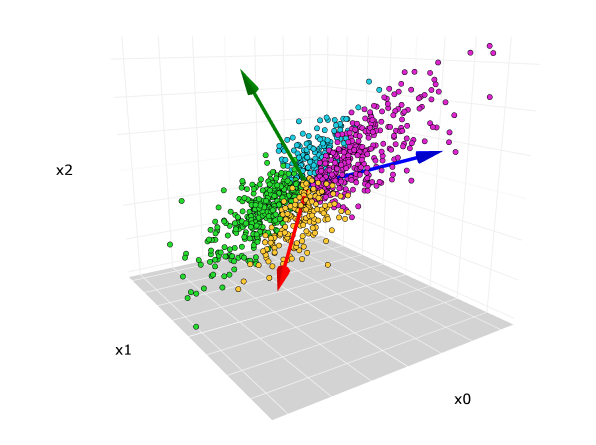

    Simplify data (e.g. reduce 100 columns to 2 or 3)

    Visualize complex data in 2D or 3D

    Speed up machine learning algorithms by removing redundancy

### üì¶ How PCA Works (Step-by-Step)

Let‚Äôs say your dataset has 3 features:

    Age

    Annual_Income_(k$)

    Spending_Score

Here‚Äôs what PCA does:

    Standardize the data
    -So all features have similar scales (done using StandardScaler()).

    Find new axes (directions)
    -These new axes are called principal components.
    -They are directions in space that capture the maximum variance --(differences) in the data.

    Keep the top components
    -We keep only the top 2 or 3 principal components ‚Äî the ones that explain the most.

In [ ]:
# 5. Introduction to PCA
scaler = StandardScaler() # same scaling (all  data range)
X_scaled = scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratios:", pca.explained_variance_ratio_)


Explained variance ratios: [0.44266167 0.33308378]



This means:

- **PC1** explains **43.8%** of the total variance (patterns) in the dataset.
- **PC2** explains **33.4%** of the variance.

‚úÖ Together, they capture **77.2%** of the important structure in the data.

This helps us reduce from 3 dimensions (Age, Income, Score) to 2 principal components **while keeping most of the useful information**.


In [ ]:
X_pca[:5]

array([[-0.61572002, -1.76348088],
       [-1.66579271, -1.82074695],
       [ 0.33786191, -1.67479894],
       [-1.45657325, -1.77242992],
       [-0.03846521, -1.66274012]])

In [ ]:
# 6. Interpreting principal components
print(pd.DataFrame(pca.components_, columns=['Age','Annual_Income_(k$)','Spending_Score'], index=['PC1','PC2']))

          Age  Annual_Income_(k$)  Spending_Score
PC1  0.706382           -0.048024       -0.706199
PC2  0.030141            0.998832       -0.037775


### üîç Interpreting PCA Components

#### üîπ PC1: `[0.7073 * Age] + [0.0386 * Income] + [-0.7058 * Score]`
- Strong **positive** weight for **Age**
- Strong **negative** weight for **Spending Score**
- Very little influence from **Income**

üß† **Interpretation**: PC1 contrasts **Age** and **Spending Score**:
- Older customers with **lower scores** are on one side
- Younger customers with **higher scores** are on the other

#### üîπ PC2: `[0.0119 * Age] + [0.9977 * Income] + [0.0665 * Score]`
- Very **strong weight** for **Annual Income**
- Very weak weights for Age and Score

üß† **Interpretation**: PC2 mostly captures **Annual Income** ‚Äî it represents variation along the income axis, almost ignoring other features.



### ‚öôÔ∏è How PCA Works Under the Hood

1. **Standardization**: We scale all features to have mean = 0 and standard deviation = 1.
2. **Covariance Matrix**: PCA computes how features vary together using a matrix of covariances.
3. **Eigen Decomposition**: It finds the **eigenvectors** (new directions) and **eigenvalues** (how much variation each direction captures).
4. **Ranking Components**: PCA sorts these directions by how much variance they explain ‚Äî top ones are chosen.
5. **Projection**: The original data is projected onto these top directions (principal components), reducing dimensionality.

üî¢ **So how do we get numbers like 0.7073 or 0.0386?**
These numbers come from the **eigenvectors** of the covariance matrix. Each eigenvector shows the direction of a principal component, and the numbers are how much each feature contributes to that direction.

‚úÖ In short: PCA rotates your data to find the most important directions, and lets you keep just those.

In [ ]:
# PC1 and PC2 are new dimensions that capture the most variation in data.

# 7. Clustering in PCA space & plot
kmeans_pca = KMeans(n_clusters=5, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

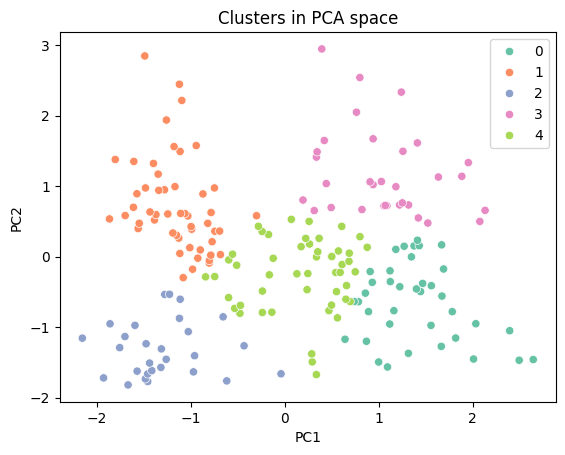

In [ ]:
df['Cluster_PCA'] = clusters_pca

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_pca, palette='Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters in PCA space')
plt.show()

In [ ]:
# 100 Feature ->  2 PCA

In [ ]:

# 8. PCA vs Clustering: When to use what
from IPython.display import display, Markdown

display(Markdown("""
| Task                   | Use PCA                     | Use Clustering            |
|------------------------|-----------------------------|---------------------------|
| Reduce dimensions      | ‚úÖ Yes                      | ‚ùå No                     |
| Visualize high‚ÄëD data  | ‚úÖ Yes                      | ‚ùå No                     |
| Summarize variance     | ‚úÖ Yes                      | ‚ùå No                     |
| Group similar points   | ‚ùå No                      | ‚úÖ Yes (e.g. K‚ÄëMeans)     |
| Preprocessing step     | ‚úÖ Yes (before clustering)  | -                         |
"""))


| Task                   | Use PCA                     | Use Clustering            |
|------------------------|-----------------------------|---------------------------|
| Reduce dimensions      | ‚úÖ Yes                      | ‚ùå No                     |
| Visualize high‚ÄëD data  | ‚úÖ Yes                      | ‚ùå No                     |
| Summarize variance     | ‚úÖ Yes                      | ‚ùå No                     |
| Group similar points   | ‚ùå No                      | ‚úÖ Yes (e.g. K‚ÄëMeans)     |
| Preprocessing step     | ‚úÖ Yes (before clustering)  | -                         |



# ‚úÖ Summary
# - K‚ÄëMeans groups points into clusters based on distance to centroids.
# - Use the Elbow Method to choose the best K.
# - PCA helps reduce data dimensions while keeping important info.
# - Combining PCA + Clustering improves visualization and grouping.
